<h1 style = "font-family:'Bernard MT Condensed';font-size:4rem;color:orange;">Capomulin against Squamous Cell Carcinoma (SCC)</h1>

<h2 style = "font-family:'Tw Cen MT';font-size:3rem;">Analysis</h2>

<h4 style = "font-family:'Arial Narrow';font-size:1.8rem;"> 
    
• The results of the Capomulin study proved to be the second most efficient among the other 13 drugs and Placebo administered to mice.
      
• The drug Ramicane yielded the most promising results concerning the average tumor size, variation, standard deviation, and standard error.
    
• Although Ramicane gave the most favorable statistical results for mean, median, variation, std dev, and std error. Capomulin gave the most accurate IQR with a result of 7,782 vs Ramicane's IQR of 9,099
    
• Among mice treated with Capomuilin, there was a correlation between mouse weight and tumor size of 0.842.</h4>

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pathlib import Path
import numpy as np

In [2]:
# Store filepaths into variable
mouse_metadata_path = Path("data/Mouse_metadata.csv")
study_results_path = Path("data/Study_results.csv")

# Read in files
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

In [3]:
# Combine the data into a single dataset
study_mouse_combined = pd.merge(mouse_metadata_df, study_results_df, how="right", on="Mouse ID")

# Organize the columns 
study_mouse_organized = study_mouse_combined[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", "Drug Regimen", "Sex", "Age_months", "Weight (g)"]]
study_mouse_organized

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [4]:
# Checking the number of mice
mice_number = study_mouse_organized["Mouse ID"].nunique()
mice_number

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = study_mouse_organized.loc[study_mouse_organized.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
dup_mice

array(['g989'], dtype=object)

In [6]:
# Get all the data for the duplicate mouse ID. 
dup_mice_info = study_mouse_organized.loc[study_mouse_organized["Mouse ID"] == "g989", :]
dup_mice_info.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_set = study_mouse_organized[study_mouse_organized["Mouse ID"].isin(dup_mice)==False]
clean_data_set.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


<h3 style = "font-family:'Tw Cen MT';">Note: Use this cleaned DataFrame for the remaining steps.</h3>

In [8]:
# Checking the number of mice in the clean DataFrame.
new_mice_number = clean_data_set["Mouse ID"].nunique()
new_mice_number

248

<h2 style = "font-family:'Tw Cen MT';font-size:3rem;">Summary Statistics</h2>

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = round(clean_data_set["Tumor Volume (mm3)"].groupby(clean_data_set["Drug Regimen"]).mean(),3)
median = round(clean_data_set["Tumor Volume (mm3)"].groupby(clean_data_set["Drug Regimen"]).median(),3)
variance = round(clean_data_set["Tumor Volume (mm3)"].groupby(clean_data_set["Drug Regimen"]).var(),3)
std = round(clean_data_set["Tumor Volume (mm3)"].groupby(clean_data_set["Drug Regimen"]).std(),3)
sem = round(clean_data_set["Tumor Volume (mm3)"].groupby(clean_data_set["Drug Regimen"]).sem(),3)

# Assemble the resulting series into a single summary DataFrame.
data_statistics = pd.DataFrame ({
    "Mean Tumor Volume": mean,
    "Median Tumor Volume": median,
    "Tumor Volume Variance": variance,
    "Tumor Volume Std. Dev.": std,
    "Tumor Volume Std. Err.": sem})

data_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [10]:
# Using the aggregation method, produce the same summary statistics in a single line.
agg_statistics = round(clean_data_set.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]}),3)
agg_statistics

Tumor Volume (mm3)                              
                           mean  median     var    std    sem
Drug Regimen                                                 
Capomulin                40.676  41.558  24.948  4.995  0.329
Ceftamin                 52.591  51.776  39.290  6.268  0.470
Infubinol                52.885  51.821  43.129  6.567  0.492
Ketapril                 55.236  53.699  68.554  8.280  0.604
Naftisol                 54.332  52.509  66.173  8.135  0.596
Placebo                  54.034  52.289  61.168  7.821  0.581
Propriva                 52.321  50.446  43.852  6.622  0.544
Ramicane                 40.217  40.673  23.487  4.846  0.321
Stelasyn                 54.233  52.432  59.451  7.710  0.573
Zoniferol                53.237  51.818  48.533  6.967  0.516

<h2 style = "font-family:'Tw Cen MT';font-size:3rem;">Bar & Pie Charts</h2>

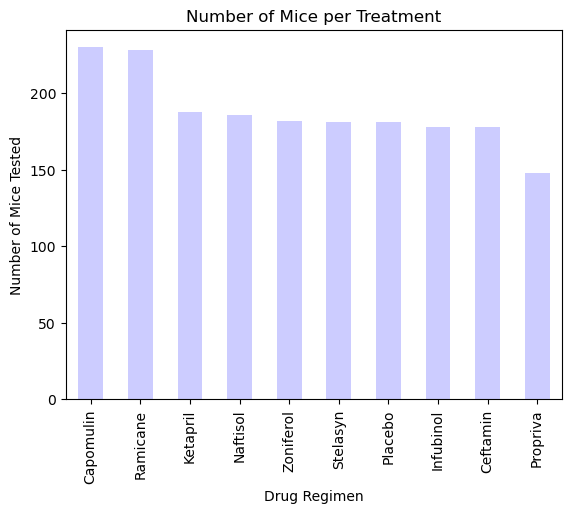

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_tested = clean_data_set["Drug Regimen"].value_counts()

# Create the first bar chart with the Pandas DataFrame.plot() method.
bar_plot = mice_tested.plot(kind='bar', x="Drug Regimen", y="Number of Mice Tested", color="blue", alpha=0.2, legend=False)

# set the chart title and axis labels
plt.title("Number of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.rcParams["font.family"] = "Tw Cen MT"

# display the chart
plt.show()

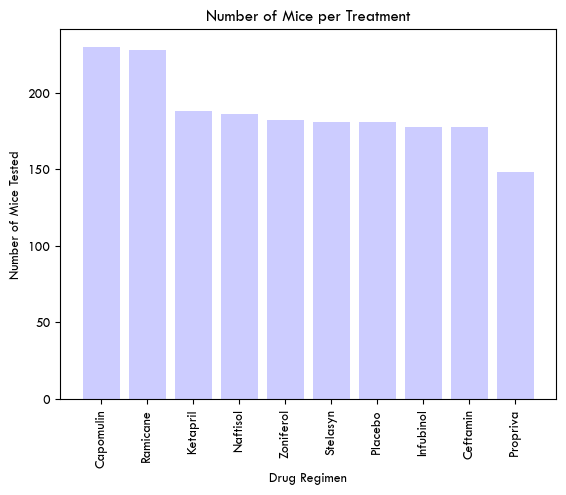

In [12]:
# Create the second bar chart with Matplotlib's pyplot methods.
x_axis = mice_tested.index.values
y_axis = mice_tested.values

plt.bar(x_axis, y_axis, color="blue", alpha=0.2)

# set the chart title and axis labels
plt.title("Number of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.rcParams["font.family"] = "Tw Cen MT"
plt.xticks(rotation="vertical")
plt.show()

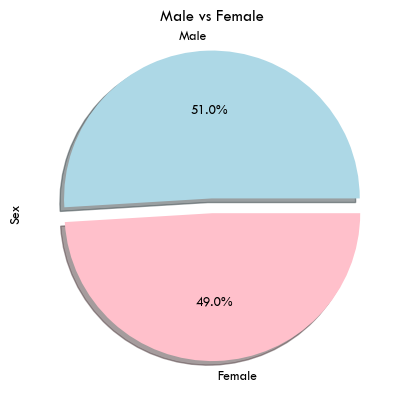

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = clean_data_set["Sex"].value_counts()
labels = ["Female", "Male"]
colors = ["lightblue","pink"]
explode = (0.1, 0)

# Create the first pie chart with the Pandas DataFrame.plot() method.
pie_plot = gender.plot(kind='pie', autopct= "%1.1f%%", shadow=True, colors=colors, explode=explode)
plt.title("Male vs Female")
plt.rcParams["font.family"] = "Tw Cen MT"

# display the chart
plt.show()

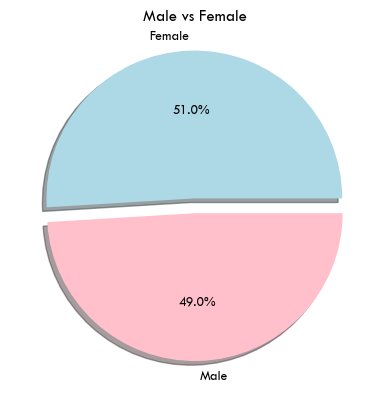

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender, labels=labels, autopct="%.1f%%", shadow=True, colors=colors, explode=explode)
plt.title("Male vs Female")
plt.rcParams["font.family"] = "Tw Cen MT"
plt.show()

<h2 style = "font-family:'Tw Cen MT';font-size:3rem;">Quartiles, Outliers & Boxplots</h2>

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

last_timepoint = clean_data_set.groupby('Mouse ID')['Timepoint'].max()

print(last_timepoint.head(15))

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
a401    45
a411    45
a444    45
a457    10
a492    45
a520    45
a577    30
a644    45
a685    45
a699    45
Name: Timepoint, dtype: int64


In [16]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge = pd.merge(last_timepoint, clean_data_set, on=("Mouse ID","Timepoint"),how="left")
merge.head(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
5,a401,45,66.794156,4,Zoniferol,Female,8,25
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
8,a457,10,49.783419,0,Ketapril,Female,11,30
9,a492,45,60.122011,1,Stelasyn,Male,20,25


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Determine outliers using upper and lower bounds
# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments_list:
    subset_data = merge[merge["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]

    quartiles =subset_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25].round(3)
    upperq = quartiles[0.75].round(3)
    iqr = round(upperq-lowerq, 3)
    
    lower_bound = round(lowerq - (1.5*iqr), 3)
    upper_bound = round(upperq + (1.5*iqr), 3)
    
    outliers = [x for x in subset_data if x < lower_bound or x > upper_bound]

    tumor_vol_data.append(subset_data)
    
    print(f"{treatment}:")
    print(f"IQR: {iqr}")
    print(f"Lower bound: {lower_bound}")
    print(f"Upper bound: {upper_bound}")
    print(f"Potential outliers: {outliers}")
    print("\n")

Capomulin:
IQR: 7.782
Lower bound: 20.704
Upper bound: 51.832
Potential outliers: []


Ramicane:
IQR: 9.099
Lower bound: 17.911
Upper bound: 54.308
Potential outliers: []


Infubinol:
IQR: 11.477
Lower bound: 36.834
Upper bound: 82.742
Potential outliers: [36.3213458]


Ceftamin:
IQR: 15.578
Lower bound: 25.355
Upper bound: 87.667
Potential outliers: []




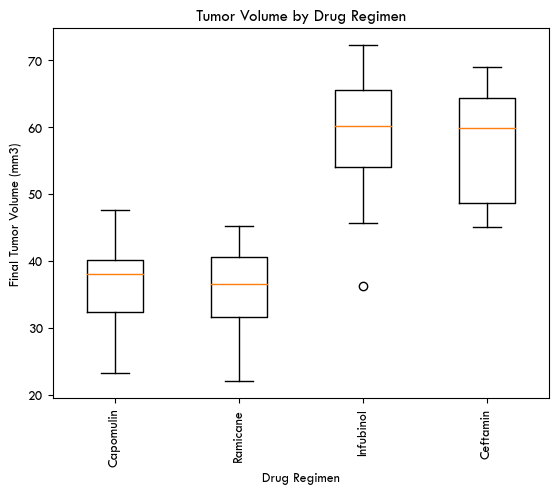

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig = plt.subplots()
plt.boxplot(tumor_vol_data)
plt.title("Tumor Volume by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks([1,2,3,4], treatments_list, rotation=90)
plt.show()

<h2 style = "font-family:'Tw Cen MT';font-size:3rem;">Line and Scatter Plots</h2>

In [19]:
# set aside data to use
capomulin = clean_data_set[(clean_data_set["Drug Regimen"] == "Capomulin")]
capomulin.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


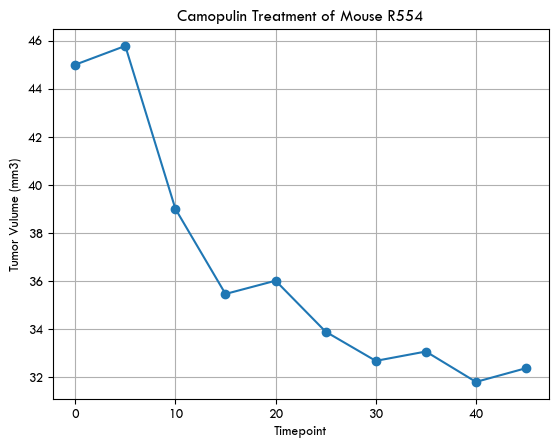

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_id = capomulin[(capomulin["Mouse ID"] == "r554")]

plt.plot(mouse_id["Timepoint"],mouse_id["Tumor Volume (mm3)"],marker="o")
plt.title("Camopulin Treatment of Mouse R554")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Vulume (mm3)")
plt.grid()
plt.show()

C:\Users\aliso\AppData\Local\Temp\ipykernel_2964\1911908408.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_tumor = capomulin.groupby(["Mouse ID"]).mean()


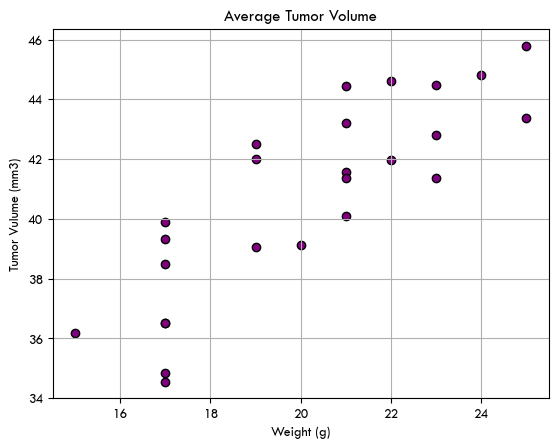

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
average_tumor = capomulin.groupby(["Mouse ID"]).mean()

plt.scatter(average_tumor["Weight (g)"],average_tumor["Tumor Volume (mm3)"],facecolors ="purple", edgecolors ="black")
plt.title("Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Vulume (mm3)")
plt.grid()
plt.show()

<h2 style = "font-family:'Tw Cen MT';font-size:3rem;">Correlation and Regression</h2>

0.842


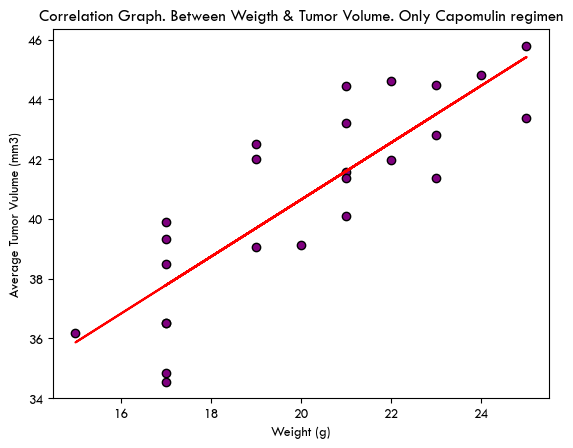

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen 
correlation = round(st.pearsonr(average_tumor["Weight (g)"],average_tumor["Tumor Volume (mm3)"])[0],3)
print(correlation)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(average_tumor["Weight (g)"],average_tumor["Tumor Volume (mm3)"])
regress_values = average_tumor["Weight (g)"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,3))

plt.scatter(average_tumor["Weight (g)"],average_tumor["Tumor Volume (mm3)"], facecolors ="purple", edgecolors ="black")
plt.plot(average_tumor["Weight (g)"],regress_values, color="red")
plt.title("Correlation Graph. Between Weigth & Tumor Volume. Only Capomulin regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Vulume (mm3)")
plt.annotate(line_eq,(44,20),fontsize=15,color="red")
plt.show()